### Example 6.9: Lagrange Interpolation

Apply $n$-point Lagrange interpolation to the data given in the table above, varying the number of points $n$. 

Plot both the data points and the resulting fits. 

Which number of points "looks" the best?

We begin by implementing a function that generates the polynomials using $n$-point Lagrange interpolation. 

In [1]:
import numpy as np

# n-point Lagrange interpolation
# the input are two arrays: 
# xd and yd, denoting data, 
# xd has to be increasing 
# and x denoting the point to calculate the interpolation
# n is the order of the interpolation
def LagrangeInterpolator(x,xd,yd,n):
    """Function that returns the n-point Lagrange-interpolated value at x given data xd, yd"""
    # xd and yd have to have the same length:    
    if len(xd) != len(yd):
        raise Exception("The lengths of xd and yd have to be equal")
    # n has be less than or equal to the data length
    if len(yd)<n:
        raise Exception("n has to be less or equal to the data length")
    # if not n=2, n has to divide the number of data points
    if n!=2 and len(yd)%n !=0:
        raise Exception("n has to be == 2 or divide the number of data points")
    # perform the interpolation: 
    # figure out which interval the desired x value is in: 
    for i, xi in enumerate(xd):
        if x <= xi:
            pos = i-1
            break
    # print('x falls between index', pos, 'and', pos+1)
    # calculate the interpolated value
    poly = 0
    # take care around the edges!
    if pos > len(xd)-1-n:
        pos = len(xd)-n
    # construct the Lagrange terms: 
    for ii in range(pos, pos+n):
        lambdaii = yd[ii] # this will end up being lambda_i * g_i
        for jj in range(pos, pos+n):
            if ii != jj:
                lambdaii *= (x - xd[jj])/(xd[ii]-xd[jj])
        poly += lambdaii # sum lambda_i * g_i to the polynomial
    return poly

In [4]:
# Let's test the function!
# The data:
xdata = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
ydata = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# 
print(LagrangeInterpolator(40,xdata,ydata,3))

# the x coordinates where we want to perform the interpolation:
xinterp = np.linspace(0, 200, 100)

n = 2
yinterp2 = [LagrangeInterpolator(x,xdata,ydata,n) for x in xinterp]
n = 3
yinterp3 = [LagrangeInterpolator(x,xdata,ydata,n) for x in xinterp]
n = 9
yinterp9 = [LagrangeInterpolator(x,xdata,ydata,n) for x in xinterp]


32.25999999999999


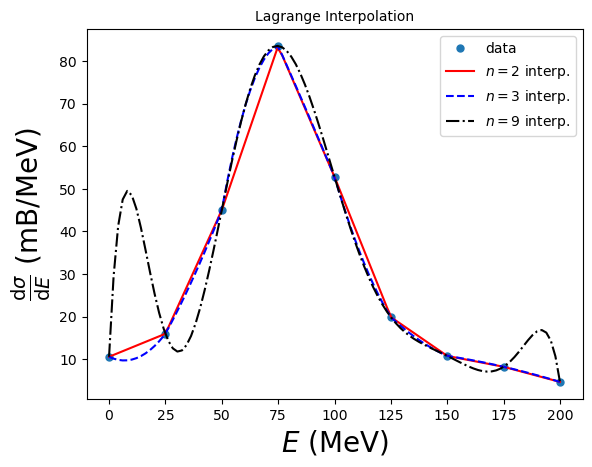

In [8]:
# and now let's plot: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$E$ (MeV)', fontsize=20) # set the x label
ax.set_ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}E}$ (mB/MeV)', fontsize=20) # set the y label 
ax.set_title('Lagrange Interpolation', fontsize=10) # set the title 

# plot the data
ax.plot(xdata, ydata, label='data', lw=0,ms=5,marker='o') 
# plot the interpolations
ax.plot(xinterp, yinterp2, label='$n=2$ interp.', color='red') 
ax.plot(xinterp, yinterp3, label='$n=3$ interp.', color='blue', ls='--') 
ax.plot(xinterp, yinterp9, label='$n=9$ interp.', color='black', ls='-.') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here